# Exercises - GEO4902-01 - General modeling concepts

[Save google-collab as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 01A - How to access the latest weather forecast:

In [9]:
# import python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from matplotlib.dates import DateFormatter

##### Specify the file on the thredds server. For example the full file of latest forecast of the AROME Arctic weather model. Note, at this point only metadata is retrieved

In [10]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/latest/arome_arctic_lagged_12_h_latest_2_5km_latest.nc'
dataset = xr.open_dataset(url)

### Metadata

In [11]:
dataset

<xarray.Dataset>
Dimensions:                    (ensemble_member: 4, height0: 1, height1: 1, height2: 1, height_above_msl: 1, pressure: 2, time: 58, x: 739, y: 949)
Coordinates:
  * time                       (time) datetime64[ns] 2023-08-08T06:00:00 ... ...
  * ensemble_member            (ensemble_member) int16 0 1 2 3
  * pressure                   (pressure) float32 850.0 925.0
  * height_above_msl           (height_above_msl) float32 0.0
  * height0                    (height0) float32 2.0
  * height1                    (height1) float32 0.0
  * height2                    (height2) float32 10.0
  * x                          (x) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * y                          (y) float32 -8.98e+05 -8.955e+05 ... 1.472e+06
    longitude                  (y, x) float64 ...
    latitude                   (y, x) float64 ...
Data variables:
    forecast_reference_time    datetime64[ns] ...
    projection_lambert         int32 ...
    x_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    y_wind_pl                  (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_pl         (time, pressure, ensemble_member, y, x) float32 ...
    air_temperature_2m         (time, height0, ensemble_member, y, x) float32 ...
    relative_humidity_2m       (time, height0, ensemble_member, y, x) float32 ...
    x_wind_10m                 (time, height2, ensemble_member, y, x) float32 ...
    y_wind_10m                 (time, height2, ensemble_member, y, x) float32 ...
    cloud_area_fraction        (time, height1, ensemble_member, y, x) float32 ...
    air_pressure_at_sea_level  (time, height_above_msl, ensemble_member, y, x) float32 ...
    precipitation_amount_acc   (time, height1, ensemble_member, y, x) float32 ...
    snowfall_amount_acc        (time, height1, ensemble_member, y, x) float32 ...
    wind_speed_of_gust         (time, height2, ensemble_member, y, x) float32 ...
    fog_area_fraction          (time, height1, ensemble_member, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.6, ACDD
    institution:                     Norwegian Meteorological Institute, MET ...
    institution_short_name:          NO/MET
    creator_url:                     met.no
    source:                          AROME-Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    min_time:                        2023-08-10 14:00:00Z
    max_time:                        2023-08-10
    geospatial_lat_min:              62.0
    geospatial_lat_max:              88.0
    geospatial_lon_min:              -18.0
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         https://www.met.no/en/free-meteorologica...
    comment:                         For more information, please visit https...
    keywords_vocabulary:             GCMDSK:GCMD Science Keywords:https://gcm...
    keywords:                        GCMDSK:Earth Science > Atmosphere > Atmo...
    dataset_production_status:       Active
    iso_topic_category:              climatologyMeteorologyAtmosphere
    spatial_representation:          grid
    naming_authority:                no.met
    history:                         2023-08-08T08:30:03 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [12]:
# Function to find a specific lat/lon location 

import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [13]:
#Find a specific location, for example for Longyearbyen

lon = 15.46; lat= 78.24
[xloc,yloc] = findindex(dataset.latitude,dataset.longitude,lon,lat) 

t2m_point = dataset.air_temperature_2m[:,0,1,xloc,yloc]

#Note the number of dimentsions of the temperature array and cross-check with the metadata

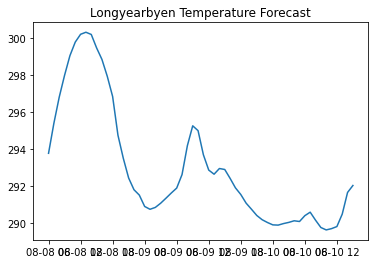

In [14]:
from matplotlib import pyplot as plt

plt.plot(dataset.time, t2m_point, '-')

plt.title("Longyearbyen Temperature Forecast")
plt.show()

### Plot one forecast on a map

#### Choose ensemble member and timestep 

In [15]:
ensemble_mem = 1
timestep = 2

t2m_area = dataset.air_temperature_2m[timestep,0,ensemble_mem,:,:]

/home/maltem/.local/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


Text(0.5, 0.98, 'Temperature forecast')

/home/maltem/.local/lib/python3.6/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/maltem/.local/lib/python3.6/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/maltem/.local/lib/python3.6/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


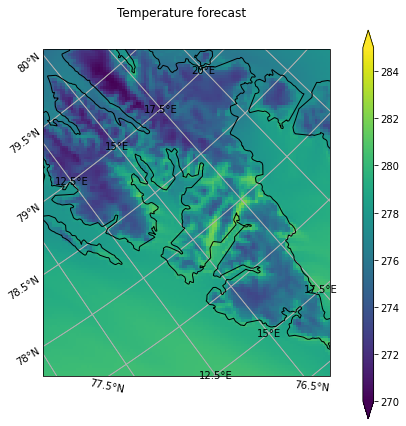

In [16]:
projection = cy.crs.LambertConformal(central_longitude =dataset.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =dataset.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = dataset.projection_lambert.standard_parallel)
fig = plt.figure(figsize=[6, 6])

ax = plt.subplot(1, 1, 1, projection=projection)
ax.set_extent([lon - 1.5, lon + 1.5, lat-1.5, lat+1.5], cy.crs.PlateCarree())

ax.gridlines()
ax.add_feature(cy.feature.COASTLINE, zorder=2) 
cf = ax.pcolormesh(t2m_area.longitude,t2m_area.latitude,t2m_area[:,:],transform=cy.crs.PlateCarree(), zorder=1)
cf.set_clim(270,285)
gl = ax.gridlines(draw_labels=True)
gl.top_labels   = False
gl.right_labels = False
   
cbaxes = fig.add_axes([0.92, 0.025, 0.025, 0.9])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='vertical', extend='both')

fig.suptitle('Temperature forecast')